---------------------------


# Performance Assessment: D208 Predictive Modeling Task 1 - Multiple Linear Regression.

## Michael Hindes
Department of Information Technology, Western Governors University
<br>D208: Predictive Modeling
<br>Professor Dr. Straw
<br>March 21, 2024


# Part I: Research Question
## Describe the purpose of this data analysis by doing the following::

### **A1. Research Question:**
**A1. Research Question:
"What factors contribute to the length of a patient's initial hospital stay?"**

This question aims to identify key variables within the dataset that influence `Initial_days`; The number of days the patient stayed in the hospital during the initial visit to the hospital. 

### **A2. Define the goals of the data analysis.**

The project sets out to explore the relationship between a response and predictor variables by exploring raw medical data and developing a multiple linear regression model. The research question focuses on identifying any potential factors that affect the length of a patient's initial hospital stay by exploring factors such as demographic details, medical history, financial factors, and services received. Python and associated libraries are used for analysis, and that supported by visual aids for clarity. Data cleaning and wrangling is emphasized to ensure accuracy and reliability.The Python code for analysis, data cleaning, and preparation will be shared. The culmination of this project involves creating, evaluating and reducing a multiple linear regression model, discussing its significance both statistically and practically, highlighting limitations, and suggesting actionable steps for stakeholders and future analysts based on the findings. Length of hospital stay is a critical metric in healthcare, as it can impact resource allocation, patient satisfaction, and overall hospital efficiency. By identifying the factors that contribute to a patient's hospital stay, healthcare providers can optimize their services, improve patient outcomes, and enhance the overall quality of care.

-------------------------------------


# Part II: Method Justification

## B. Describe multiple linear regression methods by doing the following:

### **B1. Summarize four assumptions of a multiple linear regression model:**

In the research on the assumption of multiple linear regression, five key assumptions were found in some places and four in others, in different combinations. They all appear critical to the validity of a model. As such I will list five assumptions below. (Statology 2023)

-   **Linearity** asserts that there is a straight-line relationship between each predictor (independent variable) and the response (dependent variable). In other words, a straight line can best show the average change in a dependent variable for one unit of change in the independent variable, holding all other independent variables constant. This can be assessed through visualizations.

-   **Little to no Multicollinearity** In an ideal scenario, the explanatory variables in the dataset should not significantly influence each other. Each observation's response should be primarily determined by its own predictor values and should be minimally affected by the values of other independent variables. 

-   **Independence of Observations** Assumes the observations in the dataset be independent of each other, meaning that the value of one observation should not be influenced by the value of another. Violations may occur in temporal or clustered data. If violated, it can lead to biased standard errors and incorrect inferences. Independence can be assessed using residual plots or statistical tests like the Durbin-Watson test.

-   **Homoscedasticity** refers to the requirement that the error terms (differences between observed and predicted values) maintain a constance variance across all points. This constant variance ensures that the model's accuracy does not depend on the value of the predictors. Homoscedasticity is often checked with a residuals plots to look for patterns where there should be none, and can be caused by a variety of factors.

-   **Normality of Errors** states that the residuals (errors) in the model are normally distributed around a mean of zero. This can be checked with a histogram or Q-Q plot of the residuals. If the residuals are not normally distributed, the model may not be accurate.

### **B2. Describe two benefits of using Python for data analysis:**

- **Rich Libraries:** While R was specifically designed with statistics and data analysis in mind, Python was chosen for its suite of libraries that facilitate every phase of the data analysis process. Libraries such as Pandas for data manipulation, NumPy for numerical computations, and Matplotlib along with Seaborn for visualizations. Statsmodels and Scikit-learn offers a platforms for applying regression and machine learning algorithms, streamlining the development of predictive models. These libraries help with a range of data analysis tasks.  (Western Governors University)

- **Versatility** Python's syntax is known for its intuitiveness and readability, and wide ranging application, making it a favorite for many, from data science to web development. This versatility extends beyond data analysis to other applications such as web development, automation, and deep learning. For instance, an analyst can easily switch from analyzing data to deploying a machine-learning model as a web application within the same programming environment. This flexibility is a significant advantage for working across multiple domains. (Western Governors University)

### **B3. Explain why multiple linear regression is an appropriate technique for analyzing the research question summarized in part I:**

Multiple linear regression (MLR) is an appropriate statistical technique for addressing the research question at hand, which aims to identify the factors contributing to the length of a patient's initial hospital stay. MLR is particularly suitable for this case because the dependent variable, `Initial_days`, is continuous, and MLR is designed to model the linear relationship between a continuous dependent variable and multiple independent variables. This sets MLR apart from other regression techniques that may handle multiple independent variables but are not specifically designed for continuous outcomes. MLR uses the independent variables to predict the value of `Initial_days`, providing insights into how each factor influences the length of a patient's initial hospital stay. By accounting for multiple factors simultaneously, MLR offers a more comprehensive understanding of the combined effects on the dependent variable. This is necessary for creating a model that can effectively inform decision-making processes and help identify the key factors influencing patient outcomes. MLR's ability to handle multiple variables and model the linear relationship between a continuous dependent variable and independent variables makes it an appropriate choice for analyzing datasets like medical_clean.csv.

# Part III: Data Preparation

## C. Summarize the data preparation process for multiple linear regression analysis by doing the following:

### **C1. Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including your annotated code.**

The cleaning process starts by reading the data into a pandas DataFrame and performing an initial examination to gain a preliminary understanding of its structure and content. This involves checking data types, identifying duplicate rows, and detecting missing values. Outliers are important to detect and be aware of, particularly when creating predictive regression models. In the context of medical data, outliers can often be the very things that are of interest, such as patients with very high cholesterol levels or very low blood pressure. These values are not necessarily errors but rather important indicators of health conditions. Therefore, outliers will be noted but not necessarily treated unless they are obvious data entry errors or if they hinder the model.

Unique values will be examined to understand the variety of information within the dataset, dropping unnecessary columns that are not relevant to the research question or predictive model, and converting categorical variables into numerical formats. Some demographic and identifier data, which represents static information about patients and cannot be altered by the hospital, will be excluded from the analysis. Missing data will be identified and addressed, ensuring its proper mitigation, and any duplicate records will be eliminated. Renaming of certain variables for a more descriptive understanding. Rounding data to a reasonable number of decimal places can improve readability and reduce computational complexity. Data visualizations such as scatter plots, histograms, and box plots will be used to understand the relationships between variables and identify patterns in the data distribution.


>### The following requirements from `Part C` of the performance assessment will be demonstrated in the multiple cells below.
-   >**C2.  Describe the dependent variable and all independent variables using summary statistics that are required to answer the research question.**

-   >**C3.  Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables.**

-   >**C4.  Describe your data transformation goals that align with your research question**

*(The Python code used in the project was heavily informed and sometimes directly puulled from the documentation listed in the `Software` section of the References section concluding this project )*

In [68]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
%pip install statsmodels
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


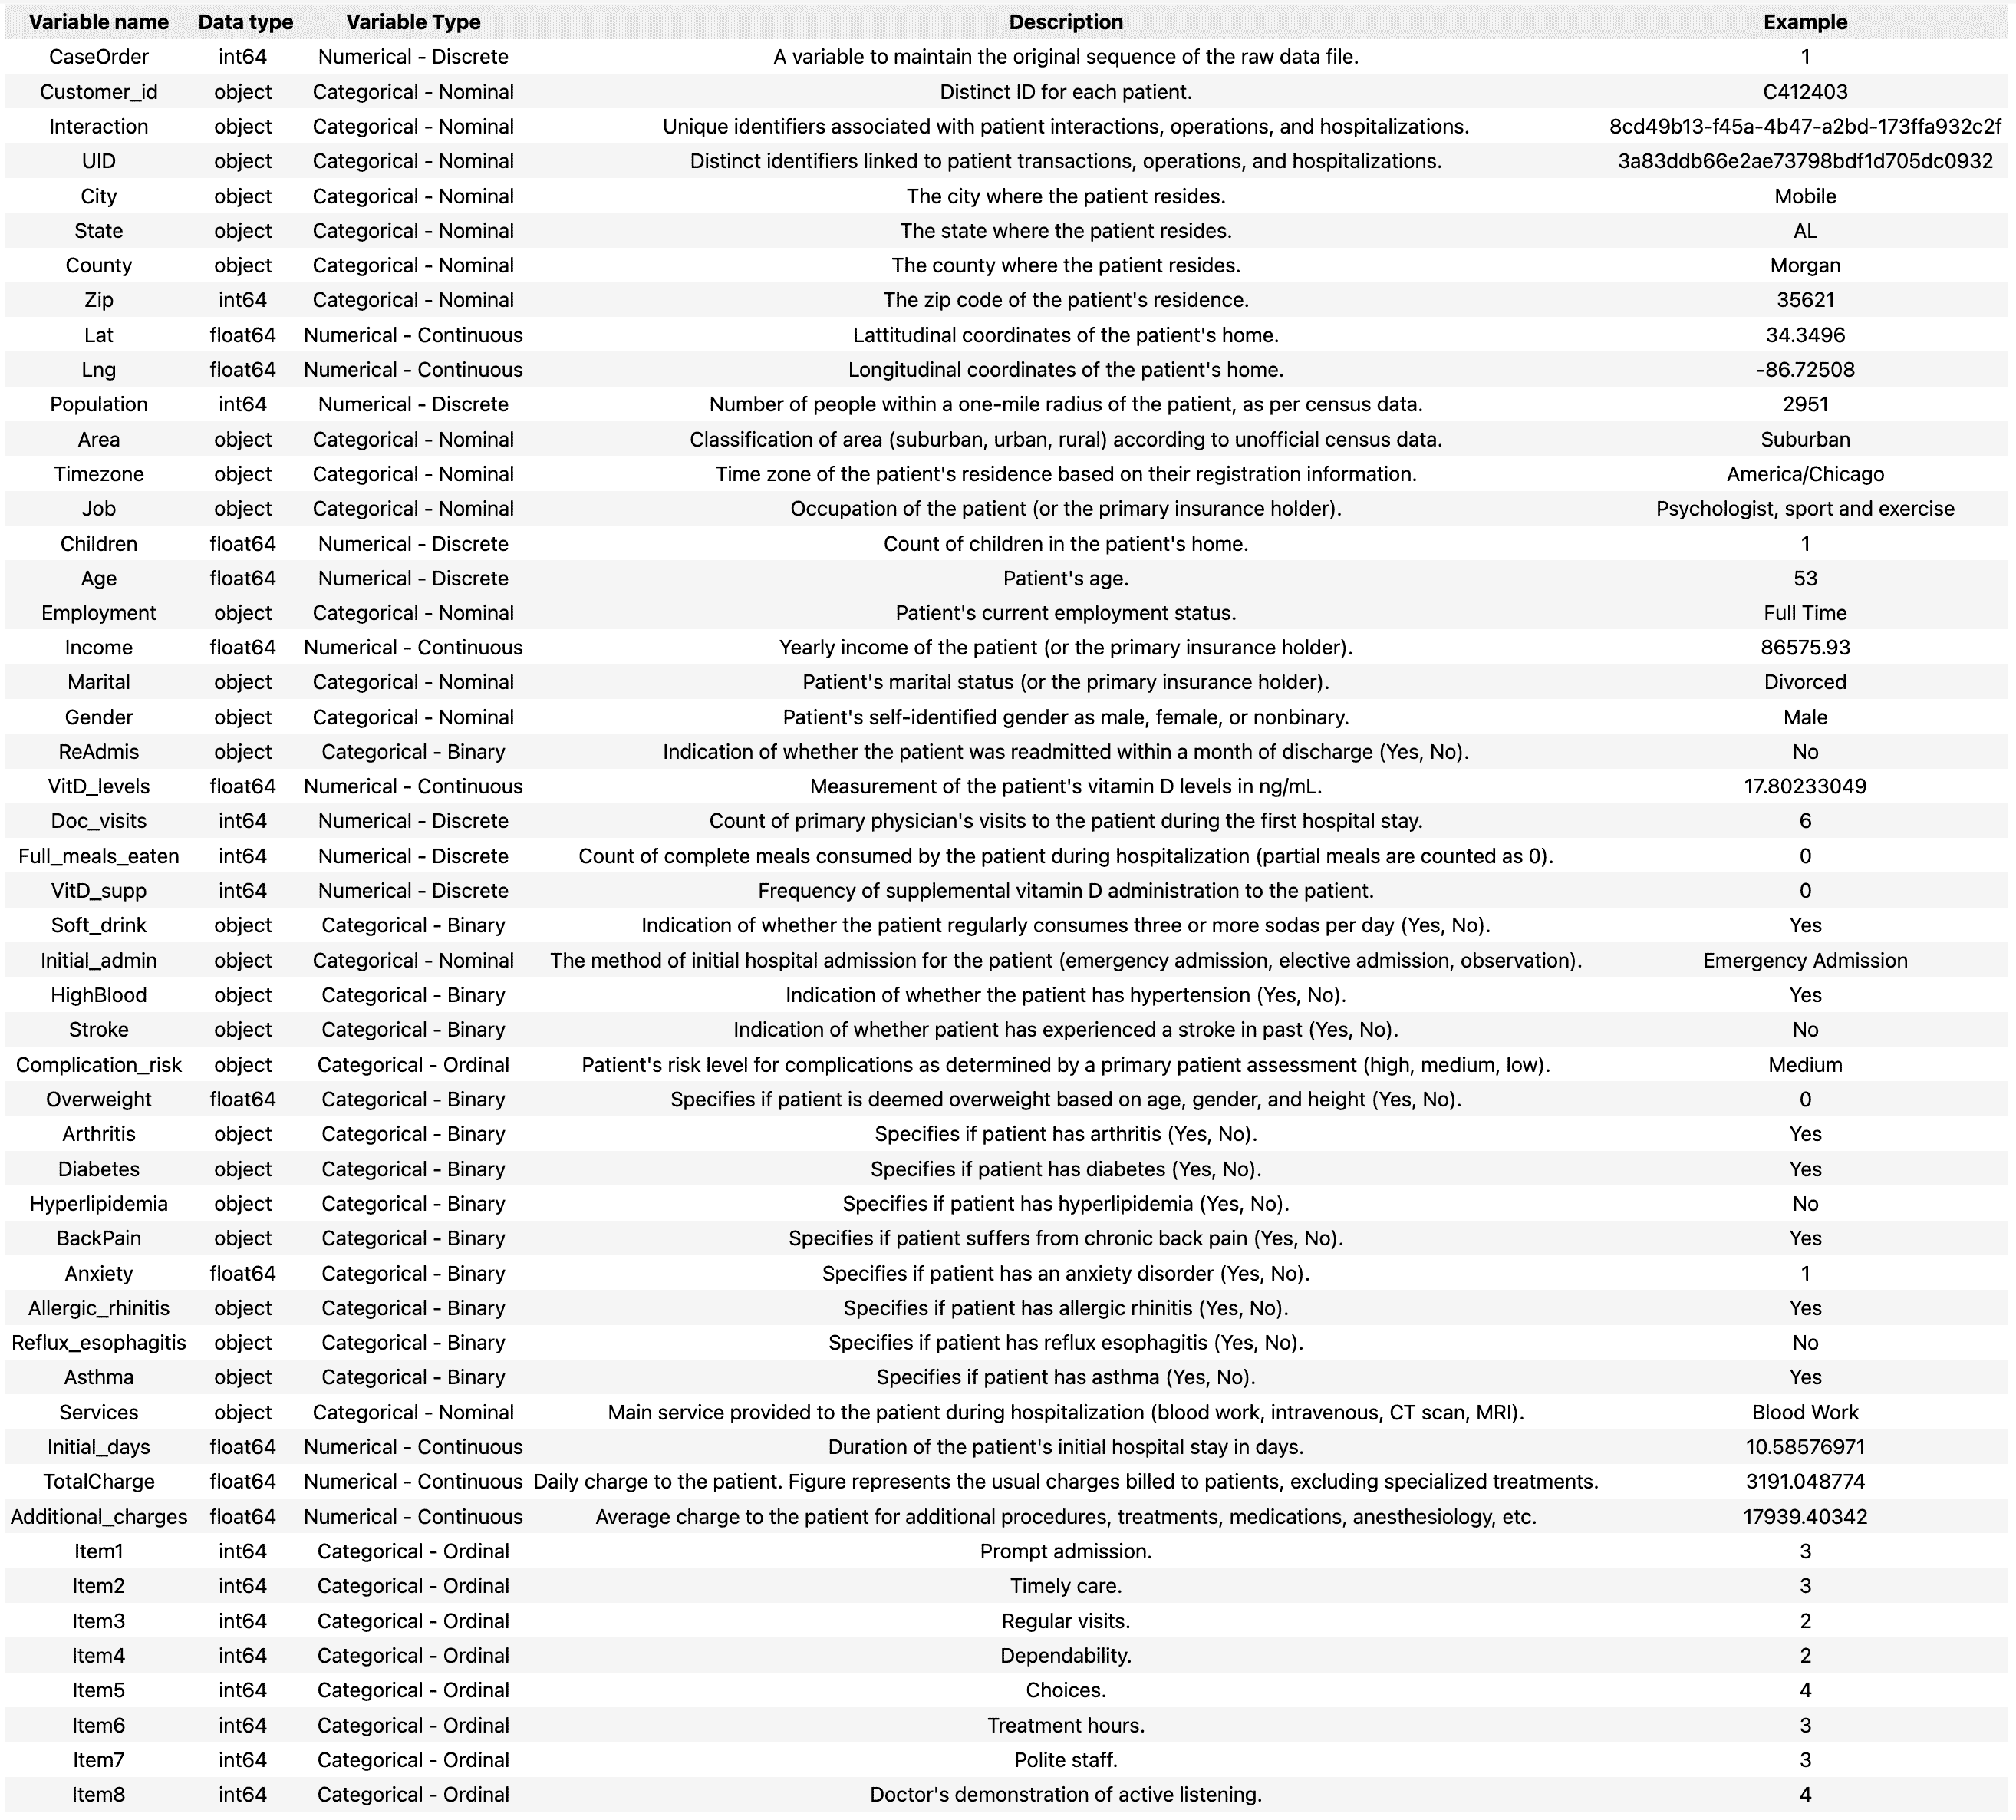

In [3]:
# original data variable description and data types with examples.
from IPython.display import Image
Image(filename='variable_description_208.png')

In [11]:
# import the data and read it into a dataframe, 
df_medical = pd.read_csv('D208_templates/medical_clean.csv')

# Display the first five rows of the data
df_medical.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [12]:
# View the last 5 rows of the dataframe
df_medical.tail()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.98086,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.56122,6850.942,8927.642,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.17702,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.66824,7741.690,28507.150,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.12907,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.15418,8276.481,15281.210,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.91043,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.35690,7644.483,7781.678,5,5,3,4,4,3,4,3
9999,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,Urban,America/New_York,Sports development officer,8,70,62682.63,Separated,Female,Yes,18.38862,5,0,1,No,Observation Admission,No,No,Low,Yes,Yes,No,Yes,No,No,Yes,No,No,Blood Work,70.85059,7887.553,11643.190,4,3,3,2,3,6,4,3


In [13]:
# Check the DataFrame information
df_medical.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [14]:
# Check for duplicate rows. 
print(df_medical.duplicated().value_counts())
print('Total Duplicated Rows: ', df_medical.duplicated().sum())

False    10000
Name: count, dtype: int64
Total Duplicated Rows:  0


In [15]:
# Check for null values
df_medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [16]:
# rename columns Item 1 to Item 8 to the appropriate column names. The 'S_' modifier is used to indicate the column is a survey item.
new_col_names={
    'Item1':'S_T_Admission',
    'Item2':'S_T_Treatment', 
    'Item3':'S_T_Visits', 
    'Item4':'S_Reliability', 'Item5':'S_Options', 
    'Item6':'S_Hours_Treatment', 
    'Item7':'S_Staff', 
    'Item8':'S_Active_Listening'}
df_medical.rename(columns=new_col_names, inplace=True)
df_medical.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'S_T_Admission', 'S_T_Treatment',
       'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment',
       'S_Staff', 'S_Active_Listening'],
      dtype='object')

In [17]:
# combine the data types and unique values count into a DataFrame easy reference and comparison
data_types = df_medical.dtypes
unique_values = df_medical.nunique()
comparison_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values})
comparison_df.sort_values(by='Unique Values', ascending=False)

,Data Type,Unique Values
CaseOrder,int64,10000
Interaction,object,10000
UID,object,10000
Customer_id,object,10000
Initial_days,float64,9997
TotalCharge,float64,9997
Income,float64,9993
VitD_levels,float64,9976
Additional_charges,float64,9418
Lng,float64,8725


# Cardinality and Data Type Summary of Variables

## Numerical Variables
- `Income`: 9993 unique values (float64)
- `VitD_levels`: 9976 unique values (float64)
- `Initial_days`: 9997 unique values (float64)
- `TotalCharge`: 9997 unique values (float64)
- `Additional_charges`: 9418 unique values (float64)
- `Population`: 5951 unique values (int64)
- `Children`: 11 unique values (int64)
- `Age`: 72 unique values (int64)
- `Doc_visits`: 9 unique values (int64)
- `Full_meals_eaten`: 8 unique values (int64)
- `vitD_supp`: 6 unique values (int64)
- `Lat`: 8588 unique values (float64)
- `Lng`: 8725 unique values (float64)

## Ordinal Variables (Categorical)
- `S_T_Admission`: 8 unique values (int64)
- `S_T_Treatment`: 7 unique values (int64)
- `S_T_Visits`: 8 unique values (int64)
- `S_Reliability`: 7 unique values (int64)
- `S_Options`: 7 unique values (int64)
- `S_Hours_Treatment`: 7 unique values (int64)
- `S_Staff`: 7 unique values (int64)
- `S_Active_Listening`: 7 unique values (int64)

## Nominal Variables (Categorical)
- `Customer_id`: 10000 unique values (object)
- `Interaction`: 10000 unique values (object)
- `UID`: 10000 unique values (object)
- `City`: 6072 unique values (object)
- `State`: 52 unique values (object)
- `County`: 1607 unique values (object)
- `Zip`: 8612 unique values (int64)
- `Area`: 3 unique values (object)
- `TimeZone`: 26 unique values (object)
- `Job`: 639 unique values (object)
- `Marital`: 5 unique values (object)
- `Gender`: 3 unique values (object)
- `ReAdmis`: 2 unique values (object)
- `Soft_drink`: 2 unique values (object)
- `Initial_admin`: 3 unique values (object)
- `HighBlood`: 2 unique values (object)
- `Stroke`: 2 unique values (object)
- `Complication_risk`: 3 unique values (object)
- `Overweight`: 2 unique values (object)
- `Arthritis`: 2 unique values (object)
- `Diabetes`: 2 unique values (object)
- `Hyperlipidemia`: 2 unique values (object)
- `BackPain`: 2 unique values (object)
- `Anxiety`: 2 unique values (object)
- `Allergic_rhinitis`: 2 unique values (object)
- `Reflux_esophagitis`: 2 unique values (object)
- `Asthma`: 2 unique values (object)
- `Services`: 4 unique values (object)

**Given the nature of the data, there are several variables that will be excluded from the analysis. Here is a brief summary of the variables that will be excluded and the rationale for their exclusion:**

### Current Strategy Overview:
1. **Broad Inclusion**: *Cast a wide net* (Middleton, 2024) Start with a wide array of variables to capture potential influences on `Initial_days`, informed by domain knowledge and based on the reccomendation of the instructors of this course. 
2. **Build Initial Model**: Use this dataset to identify significant variables.
3. **Analyze & Refine**: Eliminate non-contributing or highly correlated variables based on initial model insights.
4. **Develop Reduced Model**: Focus on key variables for a streamlined, effective model.

### Variables Eliminated:
*Note: I am a former health care professional who has worked in several hospitals, and unfortunatly have had extensive hospital stays as a patient as well. While I am not an expert on this particular data, I do have some domain knowledge, and this domain knowledge helps inform some of my decision making here.*
- **TotalCharge & Additional Charges**: Possible high correlation and generally a result of `Initial_days` not a cause of. Patients and staff often unaware of these charges until after the fact.
- **Latitude & Longitude**: Limited interpretive value and adds to model complexity.
- **Identifiers (Customer_id, Interaction, UID)**: High uniqueness; ethical concerns.
- **Geographic (City, State, County, Zip, Population)**: Overly detailed, increasing model complexity, not short/medium term actionable.
- **TimeZone**: Relevance to hospital stay length is questionable, increases complexity.
- **Full_meals_eaten**: Restrictive and targeted diets and meals are so common and depends on patient and services that without context ths variable is not useful.
- **Job**: Subjective and variable in interpretation. Better suited for targeted occupational study.
- **Services**: All very common in diagnostic phase and itself dependent on too many unknown factors, and not likely to be significant predictors. Could add confusion. 
- **Soft_drink**: Poorly defined as soft drink can mean anything from un-caffinated carbonated water to a caffinated sugary soda.
- **Survey_Items**: These are highly subjective and lack context. They are also not actionable in the short term, and we do not know at which point in the admission process they were given: after or during initial stay, during or after readmission for some, or they received their bills?
- **ReAdmis**: Readmission by definition happen after the initial stay, so this is not a predictor, but possibly a result of it in terms of temporal order.
- **Gender**: Specifically because the data dictionary states self-identified, and all gender groups are not represented, the subjective nature and lack of inclusion make the accuracy of this variable questionable.
- **VitD_supp**: Lack of context and possible interaction with other variables related to health conditions.
- **Income, Marital, Children**: All might not be related to the patient per the data dictionary. In this context, the same "households" could could show as the same "person" in the dataset, but be two different people with different underlying conditions or situations. THis analysis assumes our observations are of individuals, not households. 
- **Complication_risk**: LAck of clarity on what this means, and may directly be tied to health related variables like high_blood or diabetes, possibly intruding interactions difficult to account for without more information.
- **Area**: A category prone to change and subjective interpretation since the data was collected.

In [19]:
# create reduced dataframe with only the columns  for the analysis
colms_to_drop = ['CaseOrder', 'TotalCharge', 'Services', 'Soft_drink', 'Additional_charges', 'Lat', 'Full_meals_eaten', 'Lng', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'TimeZone', 'Job', 'Population', 'Area', 'S_T_Treatment', 'S_T_Admission', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening','vitD_supp', 'Complication_risk', 'Income', 'Marital', 'Children', 'Gender', 'ReAdmis']

df_reduced = df_medical.drop(colms_to_drop, axis=1)

# display the dataframe in full
pd.set_option('display.max_columns', None)
df_reduced.head().transpose()

,0,1,2,3,4
Age,53,51,53,78,22
VitD_levels,19.141466,18.940352,18.057507,16.576858,17.439069
Doc_visits,6,4,4,4,5
Initial_admin,Emergency Admission,Emergency Admission,Elective Admission,Elective Admission,Elective Admission
HighBlood,Yes,Yes,Yes,No,No
Stroke,No,No,No,Yes,No
Overweight,No,Yes,Yes,No,No
Arthritis,Yes,No,No,Yes,No
Diabetes,Yes,No,Yes,No,No
Hyperlipidemia,No,No,No,No,Yes


In [21]:
# Summary Stats For numeric variables

df_reduced.describe()

,Age,VitD_levels,Doc_visits,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,17.964262,5.012200,34.455299
std,20.638538,2.017231,1.045734,26.309341
min,18.000000,9.806483,1.000000,1.001981
25%,36.000000,16.626439,4.000000,7.896215
50%,53.000000,17.951122,5.000000,35.836244
75%,71.000000,19.347963,6.000000,61.161020
max,89.000000,26.394449,9.000000,71.981490


### Initial Takeaways:

- **Age**: Averages 53 years, ranging from 18 to 89, with a diverse age profile. The lack of people under 18 may be due to laws or data collection practices, and is worth noting.
- **VitD_levels**: Averages 17.96, mostly within a narrow range (9.81 to 26.39), suggesting more consistent levels across patients.
- **Doc_visits**: Averages 5 visits, indicating a similar frequency of medical consultations.

- **Categorical** nominal and ordinal variables are not included here and will include a separate summary of proportions along wit univariate and bivariate visualizations.
- **Initial_days**: Our dependent (target) variable will be fully summarize and visualized below



# Rounding Justification. 
-    Rounding `'Initial_days'` from 8 decimal places to 2 reduces the number of unique values, which can simplify analyses and visualizations by reducing the granularity of the data. Precision beyond 2 decimal places for representing days does not add meaningful information for the analysis. In many practical scenarios, especially related to days, a precision of 2 decimal places is sufficient to capture relevant variations without unnecessarily complicating the dataset.  In healthcare data, for instance, it's unlikely that fractions of a day to eight decimal places would impact decisions or care outcomes.

- Similarly, rounding  `VitD_levels` to 2 decimal places seems appropriate in this context.

In [22]:
# round 'Initial_days' and 'VitD_levels' to 2 decimal places
df_reduced = df_reduced.round({'VitD_levels': 2})
df_reduced = df_reduced.round({'Initial_days': 2})

# fisplay the dataframe with the rounded values
df_reduced[['Initial_days', 'VitD_levels']].head()

,Initial_days,VitD_levels
0,10.59,19.14
1,15.13,18.94
2,4.77,18.06
3,1.71,16.58
4,1.25,17.44


In [27]:
# Export to csv and to save results so far and to reduce memory consumption.
df_reduced.to_csv('df_reduced.csv', index=False)

---------------------------

In [28]:
# Load the data
df = pd.read_csv('df_reduced.csv')
df

,Age,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,53,19.14,6,Emergency Admission,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.59
1,51,18.94,4,Emergency Admission,Yes,No,Yes,No,No,No,No,No,No,Yes,No,15.13
2,53,18.06,4,Elective Admission,Yes,No,Yes,No,Yes,No,No,No,No,No,No,4.77
3,78,16.58,4,Elective Admission,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,1.71
4,22,17.44,5,Elective Admission,No,No,No,No,No,Yes,No,No,Yes,No,No,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,16.98,4,Emergency Admission,Yes,No,No,No,No,No,No,Yes,No,Yes,No,51.56
9996,87,18.18,5,Elective Admission,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,68.67
9997,45,17.13,4,Elective Admission,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,70.15
9998,43,19.91,5,Emergency Admission,No,No,Yes,No,No,No,Yes,No,No,No,No,63.36


-------------------------------------


# C3.  Visualizations 

Below are Univariate and Bivariate Visualizations for explanatory variables showing their relationship with the dependent variable `Initial_days`. Seaborn and Matplotlib will be used to create visualizations and the choice of graph will depend on the nature of the variable being visualized. (Python Graph Gallery. n.d), (Eyre, 2024)

# Univaraite Visualizations

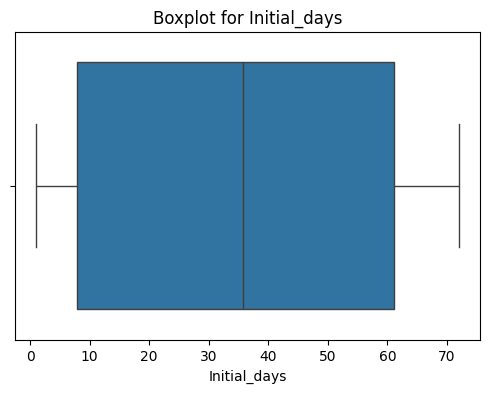

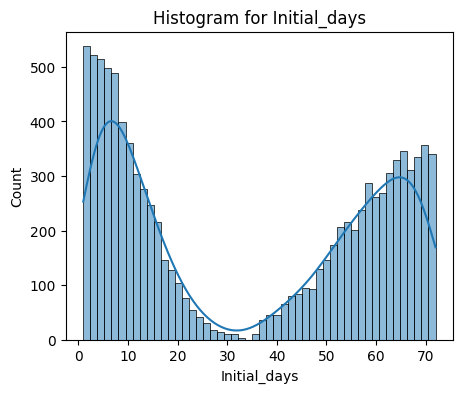

count    10000.000000
mean        34.455284
std         26.309382
min          1.000000
25%          7.900000
50%         35.840000
75%         61.162500
max         71.980000
Name: Initial_days, dtype: float64

In [29]:
# Boxplot for 'Initial_days'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Initial_days'])
plt.title('Boxplot for Initial_days')
plt.show()

# Histogram for 'Initial_days'
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='Initial_days', palette='v' kde=True, bins=50)
plt.title('Histogram for Initial_days')
plt.show()

df['Initial_days'].describe()

- **Boxplot Observations**: The median appears to be above the mid-30s, suggesting that roughly half of the patients have shorter initial stays and the other half have longer. There are no visible outliers, indicating no extreme values or anomalies that fall outside the typical range. The interfertile range shows that the middle 50% of the data spans a rather large range, suggesting a concentration of data within this segment.

- **Histogram Observations**: The distribution is bimodal, with two peaks: one just under a few days and another around 70 days. This suggests there are two groups of patients with different typical hospital stay lengths. The histogram indicates that shorter initial stays are more common than longer stays, with a significant drop-off in frequency as the number of days increases towards the middle values. The spread between the two modes shows that there is variability in the data, not concentrated around a single central value. Understanding the reasons behind this bimodal distribution may require further investigation into the factors affecting hospital stay lengths. This distribution is important to kee in mind when interpreting the results of the regression analysis, as it may influence the model's predictive accuracy and the significance of the predictors.


**Summary**: Statistical measures for `Initial_days` across all patients in the dataset, including:

- **Count**: 10,000 observations. This represents the number of patients included in the analysis.
- **Mean**: Approximately 34 days. On average, patients spend a little over a month in the hospital.
- **Standard Deviation**: About 26 days. This indicates a wide variation in the length of hospital stays among patients; while some patients have short stays, others have significantly longer stays.
- **Minimum**: Just over 1 day. This shows that some patients are discharged almost immediately after admission.
- **25% (First Quartile)**: About 8 days or less. A quarter of the patients have hospital stays just over a week.
- **Median (50%)**: Approximately 36 days. This is very close to the mean. However, the slight difference between the mean and median indicates a slight skew in the data.
- **75% (Third Quartile)**: About 61 days or less. Most patients are discharged within two months.
- **Maximum**: Nearly 72 days. Indicates that some patients have extended hospital stays.

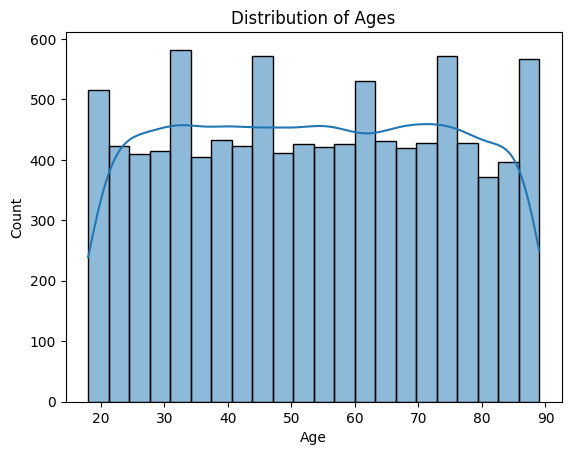

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.5117,20.638538,18.0,36.0,53.0,71.0,89.0


In [33]:
# distribution of ages
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Ages')

plt.show()

# summary statistics for the variables
df[['Age']].describe().transpose()

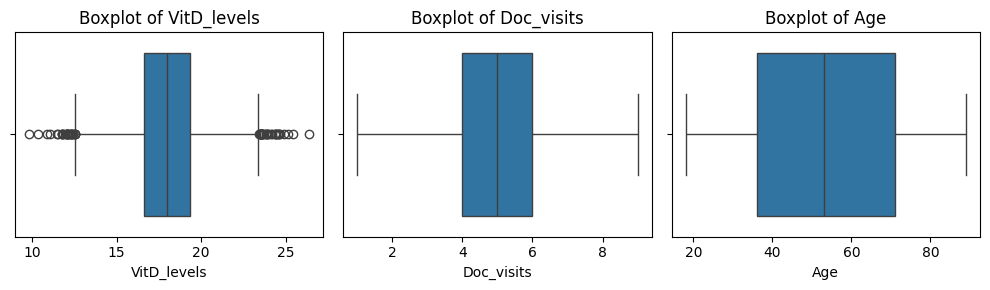

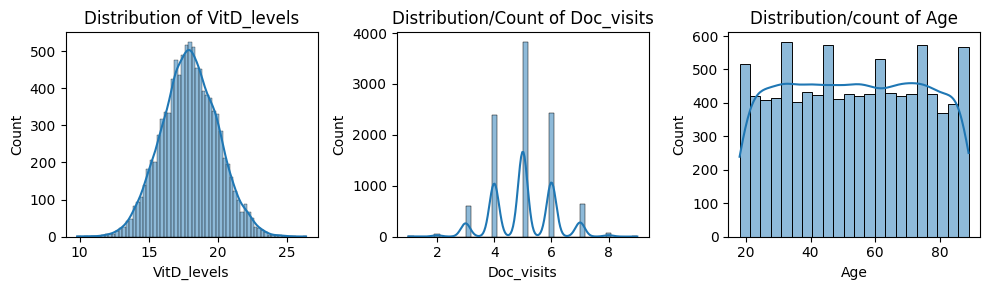

,count,mean,std,min,25%,50%,75%,max
VitD_levels,10000.0,17.964272,2.017259,9.81,16.6275,17.95,19.35,26.39
Doc_visits,10000.0,5.012200,1.045734,1.00,4.0000,5.00,6.00,9.00
Age,10000.0,53.511700,20.638538,18.00,36.0000,53.00,71.00,89.00


In [71]:
# subplots for the boxplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# boxplot of VitD_levels
sns.boxplot(data=df, x='VitD_levels', ax=axes[0])
axes[0].set_title('Boxplot of VitD_levels')

# boxplot of Doc_visit
sns.boxplot(data=df, x='Doc_visits', ax=axes[1])
axes[1].set_title('Boxplot of Doc_visits')

# boxplot of age
sns.boxplot(data=df, x='Age', ax=axes[2])
axes[2].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of VitD_levels
sns.histplot(data=df, x='VitD_levels', ax=axes[0], kde=True)
axes[0].set_title('Distribution of VitD_levels')

# distribution/count of Doc_visit
sns.histplot(data=df, x='Doc_visits', ax=axes[1], kde=True)
axes[1].set_title('Distribution/Count of Doc_visits')

# distribution/count of age
sns.histplot(data=df, x='Age', ax=axes[2], kde=True, palette='muted')
axes[2].set_title('Distribution/count of Age')

plt.tight_layout()
plt.show()
# descriptive statistics for the variables
df[['VitD_levels', 'Doc_visits', 'Age']].describe().transpose()

- The `Vitamin D levels` appear normally distributed around a middle value, suggesting that most patients have Vitamin D levels within a standard range, with fewer individuals having very high or very low levels. The boxplot suggests outliers, but in the context of the health care setting, outliers are likley the things that trigger supplementation, and relevant. `Doc_visits` show a pattern with most patientss having 4-6 visits, and the frequency drops for higher numbers of visits. Age appears generall uniform, with no values under the age of 18.

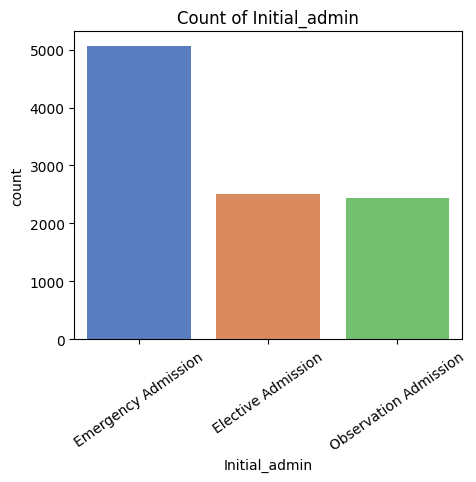

In [70]:
# create a countplot for initial_admin
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Initial_admin', palette='muted')
plt.title('Count of Initial_admin')
plt.xticks(rotation=35)
plt.show()

>  Proportion Summary 

`Initial_admin`
- Emergency: 51.60%
- Elective: 25.04%
- Observation: 24.36%


# Bivariate Visualizations

TypeError: regplot() got an unexpected keyword argument 'palette'

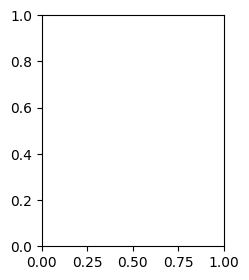

In [69]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(8, 3))

#  vitD_levels vs. Initial_days
plt.subplot(1, 3, 1)
sns.regplot(data=df, x='VitD_levels', y='Initial_days',  scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('VitD_levels vs. Initial_days')

# Age vs. Initial_days
plt.subplot(1, 3, 2)
sns.regplot(data=df, x='Age', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Age vs. Initial_days')

# Initial_days vs. Doc_visits
plt.subplot(1, 3, 3)
sns.regplot(data=df, x='Doc_visits', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Initial_days vs. Doc_visits')

plt.tight_layout()
plt.show()

 - `Vitamin D` levels and initial days don't seem to have a clear pattern, with no obvious relationship. `Age` shows a spread of data across the age range without a strong trend. `Doc_visits` suggest that there is no strong, straightforward relationship between the number of doctor visits and the average initial days, as increased doctor visits do not correlate with either a significant increase or decrease in the initial days. The bimodal distribution of Initial_days may be why one sees distributions grouped above and below the lines.

C:\Users\hinde\AppData\Local\Temp\ipykernel_3984\1166738229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Initial_admin', y='Initial_days', palette='muted')


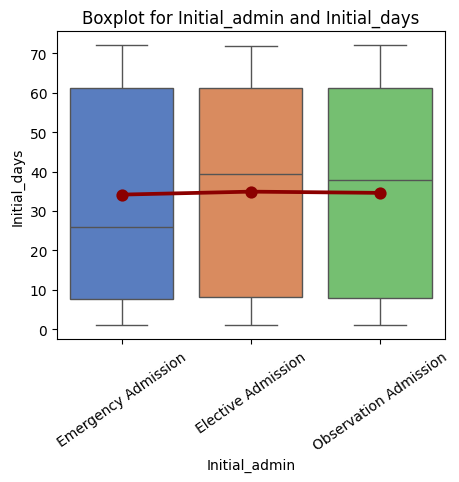

In [67]:
# boxplot with Initial_admin and Initial_days

plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Initial_admin', y='Initial_days', palette='muted')
sns.pointplot(data=df, x='Initial_admin', y='Initial_days', color='darkred', estimator=np.mean, errorbar=None)
plt.title('Boxplot for Initial_admin and Initial_days')
plt.xticks(rotation=35)
plt.show()

 Interstingly, `Initial_admin` shows a higher median for elective admissions compared to emergency admissions.

- *The red lines in the boxplot show the mean values for each group. This is more about practice with visualizations than anything and to quickly compare the mean to the median. If the mean is far away from the median, could suggests that the distribution of `Initial_days` within the category is skewed. However, the skewness alone does not directly tell one that it is a poor candidate for the model. Additionally, the order of the arrangement of categories on the x-axis of can influence the interpretation and direction of the mean line trend. If the categories are arranged in a certain order, the mean line might appear to trend up, down, or remain flat. So it's important to not draw those kinds of conclusions from the mean line alone.*

----------------------------------------------------------------------

In [53]:
df = pd.read_csv('df_reduced.csv')
df

,Age,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,53,19.14,6,Emergency Admission,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.59
1,51,18.94,4,Emergency Admission,Yes,No,Yes,No,No,No,No,No,No,Yes,No,15.13
2,53,18.06,4,Elective Admission,Yes,No,Yes,No,Yes,No,No,No,No,No,No,4.77
3,78,16.58,4,Elective Admission,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,1.71
4,22,17.44,5,Elective Admission,No,No,No,No,No,Yes,No,No,Yes,No,No,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,16.98,4,Emergency Admission,Yes,No,No,No,No,No,No,Yes,No,Yes,No,51.56
9996,87,18.18,5,Elective Admission,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,68.67
9997,45,17.13,4,Elective Admission,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,70.15
9998,43,19.91,5,Emergency Admission,No,No,Yes,No,No,No,Yes,No,No,No,No,63.36


# C4 Data Transformation
## Reexpression of categorical variables

- Since the dataset contains several  categorical variables, it is essential to re-express these variables in a numerical format to include them in the regression model. Ordinal and binary variables *(Yes/No->1/0)* will be re-expressed as well using pythons `replace` method. Nominal variables will be one-hot encoded, which involves re-expressing categorical variables as binary variables, a format the regression model can use, by creating dummy variables for each category within a categorical variable. The Pandas library provides a method for performing this transformation using the `pd.get_dummies()` function. This function creates a new binary column for each category in a categorical variable, `1` indicating the presence of that category and `0` indicating the absence. The original categorical variable is then dropped from the dataset to avoid multicollinearity issues in the regression model.


In [54]:
# select and show values counts for binary variables to compare berfore and after reexpression 
binary_vars = [col for col in df.columns if df[col].isin(['Yes', 'No']).all()]
for col in binary_vars:
    print(df[col].value_counts())

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64
Stroke
No     8007
Yes    1993
Name: count, dtype: int64
Overweight
Yes    7094
No     2906
Name: count, dtype: int64
Arthritis
No     6426
Yes    3574
Name: count, dtype: int64
Diabetes
No     7262
Yes    2738
Name: count, dtype: int64
Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64
BackPain
No     5886
Yes    4114
Name: count, dtype: int64
Anxiety
No     6785
Yes    3215
Name: count, dtype: int64
Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64
Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64
Asthma
No     7107
Yes    2893
Name: count, dtype: int64


In [55]:
# re-expression of binary variables
df[binary_vars] = df[binary_vars].replace({'Yes': 1, 'No': 0})

# check the unique values for the binary variables
for col in binary_vars:
    print(df[col].value_counts())

HighBlood
0    5910
1    4090
Name: count, dtype: int64
Stroke
0    8007
1    1993
Name: count, dtype: int64
Overweight
1    7094
0    2906
Name: count, dtype: int64
Arthritis
0    6426
1    3574
Name: count, dtype: int64
Diabetes
0    7262
1    2738
Name: count, dtype: int64
Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64
BackPain
0    5886
1    4114
Name: count, dtype: int64
Anxiety
0    6785
1    3215
Name: count, dtype: int64
Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64
Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64
Asthma
0    7107
1    2893
Name: count, dtype: int64


C:\Users\hinde\AppData\Local\Temp\ipykernel_3984\2645779669.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_vars] = df[binary_vars].replace({'Yes': 1, 'No': 0})


In [32]:
#to csv to save progress so far.
df.to_csv('df_for_one_hot.csv', index='CaseOrder')

In [33]:
#read the csv
df = pd.read_csv('df_for_one_hot.csv', index_col=0)
df.head().transpose()

CaseOrder,1,2,3,4,5
Area,Suburban,Urban,Suburban,Suburban,Rural
Children,1,3,3,0,1
Age,53,51,53,78,22
Income,86575,46805,14370,39741,1209
Marital,Divorced,Married,Widowed,Married,Widowed
Gender,Male,Female,Female,Male,Female
ReAdmis,0,0,0,0,0
VitD_levels,19.14,18.94,18.06,16.58,17.44
Doc_visits,6,4,4,4,5
vitD_supp,0,1,0,0,2


-   To handle nominal variables (categorical variables with no inherent order) in a regression model, one-hot encoding is often used. This transforms each unique category of a variable into a separate binary variable. Each new binary variable represents the presence (1) or absence (0) of the category for a data point. (Middleton, 2022)

-   To avoid introducing multicollinearity, it's common practice to drop one of the binary variables from each encoded category. Which will be done with the optional argument `drop_first=True` in the `pd.get_dummies` method.


In [34]:
# Using get_dummies to convert nominal variables to 1 and 0 for one-hot encoding and drop the first column to avoid multicollinearity.
nominal_vars = ['Area', 'Marital', 'Gender', 'Initial_admin']
df_encoded = pd.get_dummies(df, columns=nominal_vars, dtype=int, drop_first=True)

In [35]:
# Show the head of the encoded DataFrame
pd.set_option('display.max_columns', None)
df_encoded

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,0,1,1,0,1,1,1,0,1,10.59,6,6,7,7,5,6,6,5,1,0,0,0,0,0,1,0,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,1,0,0,0,0,0,0,1,0,15.13,6,5,6,5,5,5,6,6,0,1,1,0,0,0,0,0,1,0
3,3,53,14370,0,18.06,4,0,1,0,2,1,0,1,0,0,0,0,0,0,4.77,7,5,5,5,6,5,6,6,1,0,0,0,0,1,0,0,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,0,1,0,0,0,0,0,1,1,1.71,6,4,4,6,5,4,4,4,1,0,1,0,0,0,1,0,0,0
5,1,22,1209,0,17.44,5,2,0,0,1,0,0,0,1,0,0,1,0,0,1.25,7,8,6,6,4,6,5,6,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,0,16.98,4,1,1,0,2,0,0,0,0,0,1,0,1,0,51.56,6,7,7,6,5,6,5,7,0,1,0,0,0,1,1,0,1,0
9997,4,87,14983,1,18.18,5,0,1,0,2,1,1,1,0,0,0,0,0,1,68.67,6,6,5,7,4,6,5,5,0,1,0,0,0,1,1,0,0,0
9998,3,45,65917,1,17.13,4,0,1,0,3,1,0,0,0,0,1,1,0,0,70.15,6,6,6,5,5,7,6,7,0,0,0,0,1,0,0,0,0,0


- Noting the shape to be sure extra columns drop: 38 columns

In [36]:
#FINAL CLEAN TRANSFORMED CSV
df_encoded.to_csv('medical_transformed.csv', index='CaseOrder')

--------------------

- Import Transformed Data for Initial model

In [37]:
df = pd.read_csv('medical_transformed.csv', index_col=0)
df.head()

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,0,1,1,0,1,1,1,0,1,10.59,6,6,7,7,5,6,6,5,1,0,0,0,0,0,1,0,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,1,0,0,0,0,0,0,1,0,15.13,6,5,6,5,5,5,6,6,0,1,1,0,0,0,0,0,1,0
3,3,53,14370,0,18.06,4,0,1,0,2,1,0,1,0,0,0,0,0,0,4.77,7,5,5,5,6,5,6,6,1,0,0,0,0,1,0,0,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,0,1,0,0,0,0,0,1,1,1.71,6,4,4,6,5,4,4,4,1,0,1,0,0,0,1,0,0,0
5,1,22,1209,0,17.44,5,2,0,0,1,0,0,0,1,0,0,1,0,0,1.25,7,8,6,6,4,6,5,6,0,0,0,0,0,1,0,0,0,0


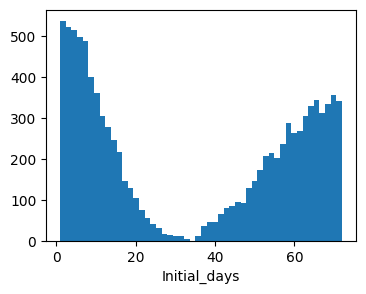

In [38]:
# create a histogram of the initial_days column
plt.figure(figsize=(4, 3))
plt.hist(df['Initial_days'], bins=50)
plt.xlabel('Initial_days')
plt.show()

--------------------

# Part IV: Model Comparison and Analysis

## D. Compare an initial and a reduced linear regression model by doing the following:

### **D1. Construct an initial multiple linear regression model from all independent variables that were identified in part C2:**

*The processes and code below were informed by several source mentioned in the refrence section. (Sewell, 2024), (UnfoldDataScience YouTube, 2023), (Stack Overflow, 2020), (GeeksforGeeks, 2023), (Indhumathy Chelliah, 2021)*

In [39]:
# muultiple regression model using df and ols and 'Initial_days' as the dependent variable and all other variables in the dataset as independent variables
X = df.drop('Initial_days', axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     714.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:24:44   Log-Likelihood:                -40411.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9962   BIC:                         8.117e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  19.4602      2.467      7.889      0.000      14.625      24.295
Children                                0.0401      0.064      0.628      0.530      -0.085       0.165
Age                                     0.0035      0.007      0.521      0.603      -0.010       0.017
Income                              -3.442e-06   4.84e-06     -0.710      0.477   -1.29e-05    6.06e-06
ReAdmis                                46.4505      0.287    162.028      0.000      45.889      47.012
VitD_levels                            -0.0775      0.069     -1.130      0.259      -0.212       0.057
Doc_visits                             -0.1714      0.132     -1.297      0.195      -0.430       0.088
vitD_supp                               0.2924      0.220      1.331      0.183      -0.138       0.723
HighBlood                              -0.4475      0.281     -1.592      0.111      -0.998       0.103
Stroke                                 -0.2008      0.346     -0.581      0.561      -0.878       0.477
Complication_risk                      -0.3944      0.189     -2.084      0.037      -0.765      -0.023
Overweight                             -0.2090      0.304     -0.687      0.492      -0.805       0.387
Arthritis                               0.6649      0.288      2.305      0.021       0.100       1.230
Diabetes                                0.0132      0.310      0.042      0.966      -0.595       0.621
Hyperlipidemia                         -0.3959      0.292     -1.354      0.176      -0.969       0.177
BackPain                                0.3505      0.281      1.247      0.213      -0.201       0.902
Anxiety                                 0.5303      0.296      1.793      0.073      -0.049       1.110
Allergic_rhinitis                       0.4092      0.283      1.447      0.148      -0.145       0.963
Reflux_esophagitis                      0.4223      0.281      1.505      0.132      -0.128       0.972
Asthma                                  0.0406      0.305      0.133      0.894      -0.557       0.638
S_T_Admission                           0.4003      0.199      2.013      0.044       0.010       0.790
S_T_Treatment                           0.1342      0.183      0.732      0.464      -0.225       0.494
S_T_Visits                             -0.1296      0.169     -0.765      0.444      -0.462       0.202
S_Reliability                           0.3911      0.151      2.592      0.010       0.095       0.687
S_Options                               0.0093      0.159      0.058      0.953      -0.302       0.321
S_Hours_Treatment                      -0.2056      0.164     -1.254      0.210      -0.527       0.116
S_Staff                                -0.2466      0.154     -1.59

# Initial Regression Model based on all predictors

-   **(ŷ) = 19.4602 + 0.0401(Children) + 0.0035(Age) - 3.442e-06(Income) + 46.4505(ReAdmis) - 0.0775(VitD_levels) - 0.1714(Doc_visits) + 0.2924(vitD_supp) - 0.4475(HighBlood) - 0.2008(Stroke) - 0.3944(Complication_risk) - 0.2090(Overweight) + 0.6649(Arthritis) + 0.0132(Diabetes) - 0.3959(Hyperlipidemia) + 0.3505(BackPain) + 0.5303(Anxiety) + 0.4092(Allergic_rhinitis) + 0.4223(Reflux_esophagitis) + 0.0406(Asthma) + 0.4003(S_T_Admission) + 0.1342(S_T_Treatment) - 0.1296(S_T_Visits) + 0.3911(S_Reliability) + 0.0093(S_Options) - 0.2056(S_Hours_Treatment) - 0.2466(S_Staff) - 0.1981(S_Active_Listening) + 0.1602(Area_Suburban) + 0.3731(Area_Urban) - 0.0263(Marital_Married) + 0.4302(Marital_Never Married) + 0.7953(Marital_Separated) + 0.2762(Marital_Widowed) - 0.0963(Gender_Male) - 0.2836(Gender_Nonbinary) - 1.6011(Initial_admin_Emergency Admission) - 0.2463(Initial_admin_Observation Admission)**




### **D2. Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question:**

-  A `backwards selection` method will be used to reduce the initial model. To justify the feature selection, model summary statistics will be analyzed, certain assumptions will be checked, and visualizations will be created and analyzed. 

### **Note:** The following requirements from `Part E` of the performance assessment will be demonstrated in the multiple cells below, but not necessarly in the exact order of the PA.

- ### *E.  Analyze the data set using your reduced linear regression model by doing the following:*

- *E1.  Explain your data analysis process by comparing the initial multiple linear regression model and reduced linear regression model, including the following element:** •  a model evaluation metric*

- *E2.  Provide the output and all calculations of the analysis you performed, including the following elements for your reduced linear regression model:** •   a residual plot •   the model’s residual standard error*

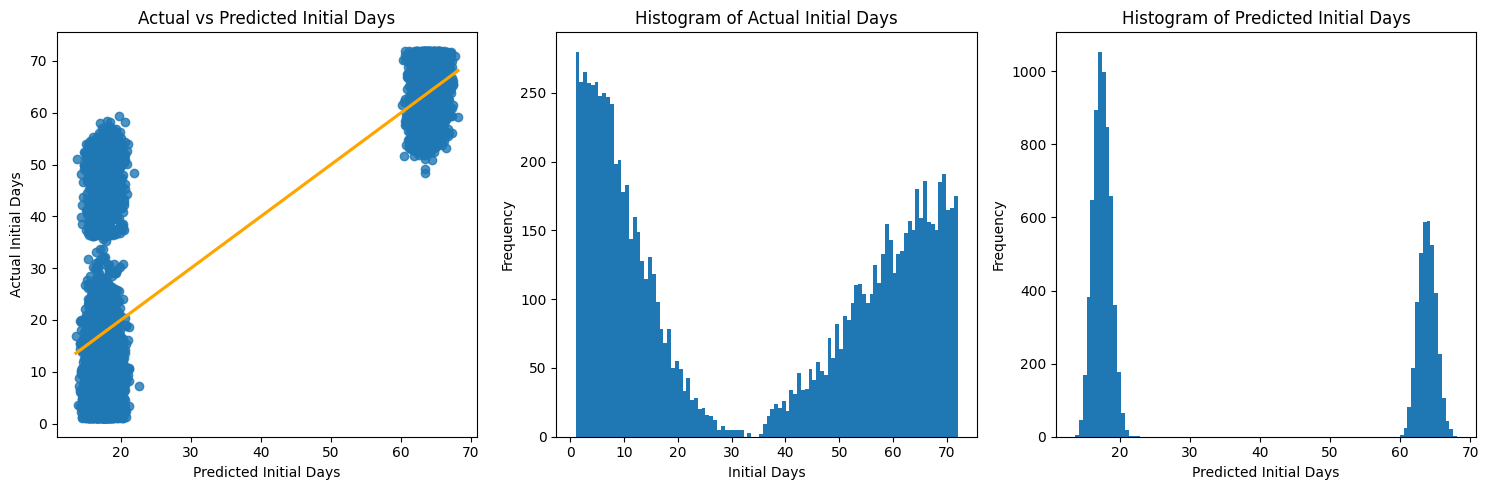

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#  actual vs predicted initial days
sns.regplot(x=predictions, y=Y, fit_reg=True, line_kws={'color':'orange'}, ax=axes[0])
axes[0].set_xlabel('Predicted Initial Days')
axes[0].set_ylabel('Actual Initial Days')
axes[0].set_title('Actual vs Predicted Initial Days')

#  histogram of actual values
axes[1].hist(Y, bins=100)
axes[1].set_xlabel('Initial Days')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Actual Initial Days')

# histogram of predicted values
axes[2].hist(predictions, bins=100)
axes[2].set_xlabel('Predicted Initial Days')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Predicted Initial Days')

plt.tight_layout()
plt.show()

- The plot of `Actual vs Predicted days` seems to miss much of the data in the middle, predicting at lower and higher values. The `actual Initial Days` histogram again shows it's bimodal distribution, suggesting two distinct groups or patterns within the data. The `predicted Initial Days` histogram clearly shows a large range of missing values in the middle, and is heavily concentrated at the low and high ends of the range.

In [41]:
# calculate RSE
mse = model.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 13.792044580624435


Rse calculation: (Stack Overflow 2023)

## Initial Model Fit:

- The R-squared is 0.726, suggesting that approximately 72.6% of the variability in `Initial_days` may be explained by the model, which in combination with the almost identical Adj. R-squared of 0.725 indicating a good fit with initial model.
- The F-statistic is 714.14 with a Prob (F-statistic) of 0.00, *suggesting* that the model is statistically significant overall.
- The AIC 8.090e+04 and BIC 8.117e+04 are very similar, suggesting suggests that both are close in their evaluation of model complexity. These will be re-examined in the reduced model to see if they are lowered. 
- Residual Standard Error calculation (RSE): 13.79 `Initial_days` ranges from 1 to 72 days. An RSE of 13.79 days represents over 19% (13.792 / 72 * 100) of the total range. This suggests that, on average, the model's predictions for length of stay can deviate from the actual values by up to 13.792 days. This seems significant in this context and indicates room for improvement.

Variables.
Some predictor variables have high t-values and low p-values (P>|t|), sometimes indicating that they are statistically significant. Of note is the `ReAdmis` feature, it has a very low p-value and a highly significant coefficient (46.4505), suggesting a strong association with `Initial_days`
However, variables such as Children, Age, Income, and others have high p-values, indicating that they might not be significant predictors of `Initial_days` in the presence of other variables.
The const coefficient (y-intercept) is 19.5835, which represents the expected value of `Initial_days` when all other predictors are at zero.
It is also important to note the values of the coefficients for the predictors. Larger values can suggest a more important role for the predictor in the model. For example, the coefficient for `ReAdmis` is 46.4505, which means that for every unit increase in `ReAdmis`, the expected value of `Initial_days` increases by 46.4505 units, holding all other predictors constant. This is a large coefficient compared to others, indicating a strong relationship between `ReAdmis` and `Initial_days`. 

- Overall, even though there are some summary statistics points to a reliable model, we should be skeptical with the warning about potential multicollinearity, and the plot of the actual vs predicted values not accounting for much of the data. There are several things we should check. 

Issues:
The note on multicollinearity "[2] The condition number is large, 8.89e+05. This might indicate that there are strong multicollinearity or other numerical problems." indicates that there might be high correlation between some predictors. This needs to be investigated. Checking the residuals and Variance inflation factor (VIF) analysis can help to identify and highly correlated predictors.
    

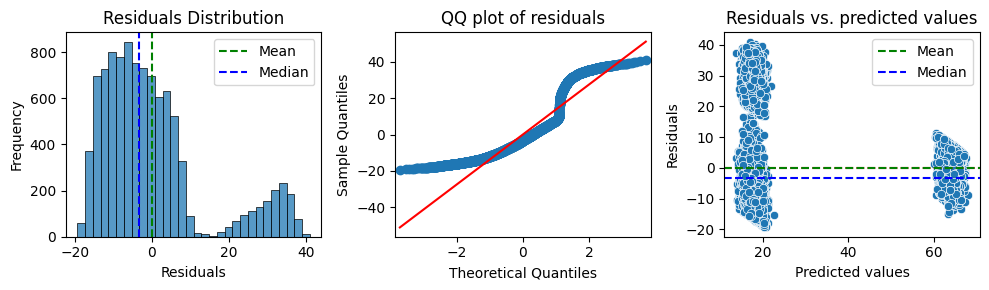

In [42]:
residuals = model.resid
# Plot the residuals
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# reesiduals Dist
sns.histplot(residuals, bins=30, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')

# mean and median lines to the histogram
mean_residuals = residuals.mean()
median_residuals = residuals.median()
axes[0].axvline(x=mean_residuals, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Residuals vs. predicted values")

# mean and median lines 
mean_residuals = residuals.mean()
median_residuals = residuals.median()
axes[2].axhline(y=mean_residuals, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()

- Ideally, one would like to see a normal distribution centered around zero for the residual distribution, but this **histogram** indicates a slightly bimodal distribution that is skewed to the right, with a tail that grows slightly positive values. Hoever, the mean is in fact around 0, which presents and interesting challenge.

- The **Q-Q plot** shows that the residuals are not normally distributed, as the points do not fall along the straight line. This plot required research to interpret as I was not familiar with it. From S. Kross as seankross.com: "*The points in Q-Q plot then cross below the blue line indicating that the actual quantiles that are close to zero are farther from zero than they should be theoretically. At the center of the theoretical distribution there are no data in the actual dataset, and therefore there is no point in the Q-Q plot at (0, 0). The upper half of the Q-Q plot is a reflection across X and Y of the bottom half.*" (Kross, 2016) The author also suggest this is the results of a residual distribution that is similar to the one I have. Additionally, the center of the theoretical distribution indeed did not have any data points as mentioned above.

- According to The residuals (errors) should be scattered randomly above and below the zero line across the entire range of predicted value and There should be no discernible pattern in the scatter plot of residuals. This is not the case in my scatter plot of residuals. Indicating that the model is not a good fit for the data.

- VIF analysis will be used to identify highly correlated predictors. 

In [43]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,const,319.858939
20,S_T_Admission,2.213926
21,S_T_Treatment,1.894971
33,Marital_Widowed,1.631655
30,Marital_Married,1.628373
31,Marital_Never Married,1.619690
32,Marital_Separated,1.617689
22,S_T_Visits,1.608013
25,S_Hours_Treatment,1.506889
37,Initial_admin_Observation Admission,1.499497


From the VIF analysis, most variables have VIF values well below 5, indicating no significant multicollinearity among them, which is surprising given the message from the model summary: *"[2] The condition number is large, 8.89e+05. This might indicate that there are strong multicollinearity or other numerical problems."* The highest VIF values observed for `S_T_Admission`, `S_T_Treatment`, and `marital` status categories, but even these do not exceed the threshold of 5, suggesting moderate correlation at most. (Stack Exchange, 2012)

Given the generally low VIF values, the summary statistics mentioned above the suggest a good model fit, the residuals and Q-Q plots, and the actual and predicted values, something less obvoius must be wrong with the initial model. It is also important to keep in mind the bimodal distribution of the actual `Initial_days` values, which may be contributing to the model's poor performance due to the violation of the assumption of normality.

One option is to try to transform the `Initial_days` variable to make it more normally distributed. This could involve taking the log of the variable, or splitting the data into two groups based on the bimodal distribution and creating separate models for each group.(Bradley, 2023) However, this would likely be complex at this point in the process and may not be necessary if a reduced model can be created that performs better than the initial model. Therefore, before that is attempted, I will employ what *domain knowledge* I have regarding the variable and use a *correlation matrix* to help identify pairwise relationships between the independent variable. In this context, perhaps a better model can be created by removing some of the predictors that are not significantly associated with `Initial_days` and may be contributing to the model's poor performance.




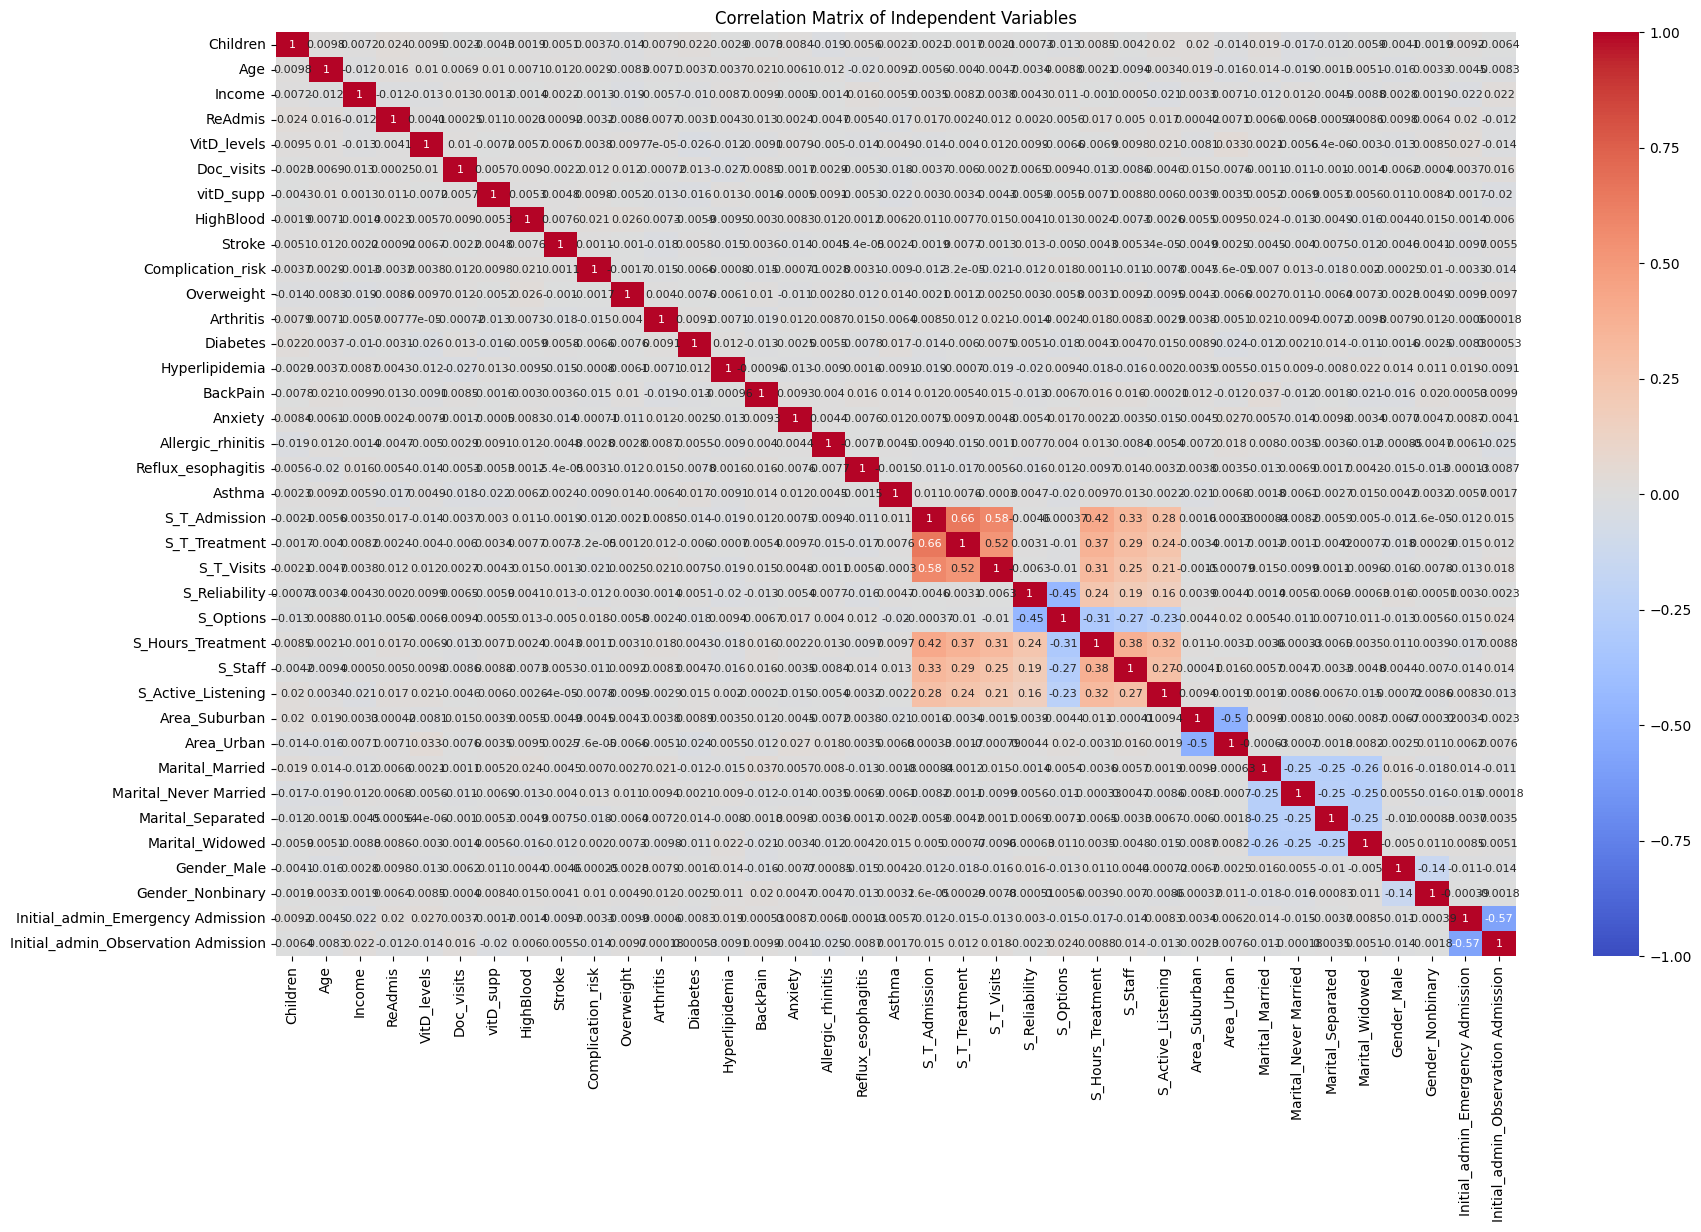

In [44]:
# assign independent variables
corr_matrix = df.drop('Initial_days', axis=1).corr()

plt.figure(figsize=(20, 12))

# correlation matrix with  values and adjusted font size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8}, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Independent Variables')
plt.show()

- The correlation matrix shows that most of the variables that contain any correlation wit each other are the survey items, marital status, area, and initial admission. These would be interesting to explore further but in the context of this analyst, are not as useful as the other predictors which are largely health and biological factors and importantly, readmission status. The survey items are likely to be highly correlated with each other, and subjective feedback worthy of their own separate analyses, but here may be getting in the way of the model.Marital status, in my personal experience, has never been a factor health care providers consider except when contacting family members. I feel that these are good candidates for removal from the model. 

In [45]:
df = df.drop(['S_T_Admission', 'S_T_Treatment', 'Marital_Widowed', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'S_T_Visits', 'S_Hours_Treatment', 'S_Reliability', 'S_Staff','S_Options', 'Area_Urban','Initial_admin_Observation Admission', 'S_Active_Listening', 'Area_Suburban','Initial_admin_Emergency Admission'], axis=1)
df.head().transpose()

CaseOrder,1,2,3,4,5
Children,1.00,3.00,3.00,0.00,1.00
Age,53.00,51.00,53.00,78.00,22.00
Income,86575.00,46805.00,14370.00,39741.00,1209.00
ReAdmis,0.00,0.00,0.00,0.00,0.00
VitD_levels,19.14,18.94,18.06,16.58,17.44
Doc_visits,6.00,4.00,4.00,4.00,5.00
vitD_supp,0.00,1.00,0.00,0.00,2.00
HighBlood,1.00,1.00,1.00,0.00,0.00
Stroke,0.00,0.00,0.00,1.00,0.00
Complication_risk,2.00,3.00,2.00,2.00,1.00


In [46]:
df.to_csv('medical_transformed_drop1.csv', index='CaseOrder')

In [47]:
# read in the new csv file
df = pd.read_csv('medical_transformed_drop1.csv', index_col=0)

In [48]:
X = df.drop(['Initial_days'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()
predictions = model_2.predict(X)
residuals_2 = model_2.resid
model_summary_2 = model_2.summary()
model_summary_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1251.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:24:56   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.092e+04
Df Residuals:                    9978   BIC:                         8.108e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 20.1671      1.574     12.816      0.000      17.082      23.252
Children               0.0302      0.064      0.473      0.636      -0.095       0.156
Age                    0.0034      0.007      0.511      0.610      -0.010       0.017
Income             -2.567e-06   4.85e-06     -0.529      0.597   -1.21e-05    6.94e-06
ReAdmis               46.4258      0.287    161.793      0.000      45.863      46.988
VitD_levels           -0.0904      0.069     -1.319      0.187      -0.225       0.044
Doc_visits            -0.1729      0.132     -1.307      0.191      -0.432       0.086
vitD_supp              0.2930      0.220      1.332      0.183      -0.138       0.724
HighBlood             -0.4396      0.281     -1.563      0.118      -0.991       0.112
Stroke                -0.1677      0.346     -0.485      0.628      -0.846       0.511
Complication_risk     -0.3983      0.189     -2.103      0.035      -0.770      -0.027
Overweight            -0.1958      0.305     -0.643      0.520      -0.793       0.401
Arthritis              0.6633      0.289      2.298      0.022       0.098       1.229
Diabetes               0.0037      0.310      0.012      0.990      -0.604       0.612
Hyperlipidemia        -0.4339      0.293     -1.483      0.138      -1.007       0.140
BackPain               0.3146      0.281      1.119      0.263      -0.237       0.866
Anxiety                0.5385      0.296      1.819      0.069      -0.042       1.119
Allergic_rhinitis      0.3978      0.283      1.406      0.160      -0.157       0.952
Reflux_esophagitis     0.3974      0.281      1.415      0.157      -0.153       0.948
Asthma                 0.0539      0.305      0.177      0.860      -0.544       0.652
Gender_Male           -0.0881      0.280     -0.315      0.753      -0.636       0.460
Gender_Nonbinary      -0.2433      0.965     -0.252      0.801      -2.135       1.649
==============================================================================
Omnibus:                     1977.930   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.405
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                       4.007   Cond. No.                     5.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# calculate RSE
mse = model_2.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 13.816250934091325


- The R-squared went from 0.726 to 0.725 
- Adj. R-squared went from 0.725 to 0.724
- The F-statistic went from 714.14 with a Prob (F-statistic) of 0.0 to 1314 with a Prob (F-statistic) of 0.0. The f-statistic increase suggests that the model is a better fit than the previous model.
- The AIC and BIC went from 8.090e+04 and 8.117e+04 to AIC 8.092e+04 and BIC 8.107e+04 are very similar to the previous model.
- Residual Standard Error calculation (RSE): 13.79 to 13.8, almost unchanged
- The condition number went from 8.88e+05 to 5.64e+05 which is a significant improvement, suggesting that the multicollinearity is less of an issue in this model. But still the condition number is high, so multicollinearity may still be a problem.


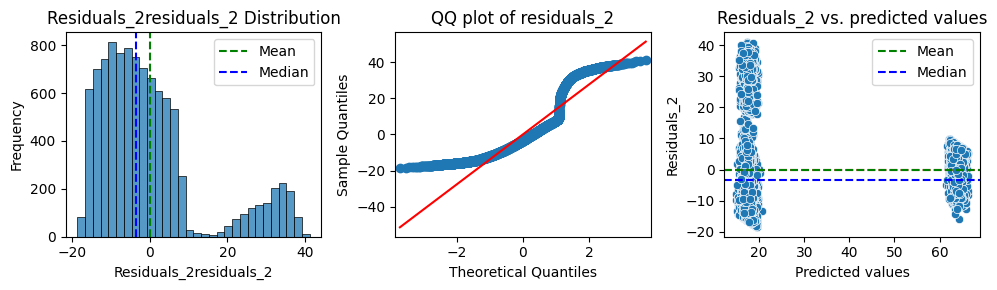

In [50]:
# Calculate the residuals_2
residuals_2_2 = model_2.resid

# Plot the residuals_2
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# iduals_2 Distribution
sns.histplot(residuals_2, bins=30, ax=axes[0])
axes[0].set_xlabel('Residuals_2residuals_2')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals_2residuals_2 Distribution')

#mean and median lines 
mean_residuals_2 = residuals_2.mean()
median_residuals_2 = residuals_2.median()
axes[0].axvline(x=mean_residuals_2, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals_2, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot
sm.qqplot(residuals_2, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals_2")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals_2, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("Residuals_2")
axes[2].set_title("Residuals_2 vs. predicted values")

# Add mean and median lines 
mean_residuals_2 = residuals_2.mean()
median_residuals_2 = residuals_2.median()
axes[2].axhline(y=mean_residuals_2, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals_2, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()

- Not much has changed in our residual plots. Although our model is slightly improved according to the F-statistic, the R-squared and the condition number, the residual plots are still showing some patterns that suggest that the model is not capturing all the information in the data.

- Let's check VIF values for each of the predictors again to see if we gain ant new insights.


In [51]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,const,129.727015
20,Gender_Male,1.022089
21,Gender_Nonbinary,1.021966
15,BackPain,1.003004
13,Diabetes,1.002739
2,Age,1.002475
14,Hyperlipidemia,1.002397
19,Asthma,1.002384
11,Overweight,1.002341
18,Reflux_esophagitis,1.002326


- The VIF values for the predictors are all essentially 1. 
- Given this information, re-examining the p-values of the predictors and their coefficients, we can eliminate the predictors with the highest p-values and lower coefficients  to see if that improves the model. Here we have to be careful, because predictors with high p-values may still be important for the model. Examining the p-values and the coefficients together, 

- After reviewing p-values and coefficients, I am choosing to remove based on coefficient as it is associated with higher p-values. 
- Eliminate those variables with `coefficients less than an absolute value of 0.4`.

In [52]:
# statistically significant variables
significant_vars = model_2.params[model_2.params.abs() > 0.4].index.tolist()

# Remove 'const' from the list
if 'const' in significant_vars:
    significant_vars.remove('const')

print('Significant variables:', significant_vars)

Significant variables: ['ReAdmis', 'HighBlood', 'Arthritis', 'Hyperlipidemia', 'Anxiety']


In [53]:
# Create a reduced model with only significant variables above
X_reduced = X[significant_vars]

# Fit the OLS model with reduced variables
model_reduced = sm.OLS(Y, sm.add_constant(X_reduced)).fit()

# Print the summary of the reduced model
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5252.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:24:59   Log-Likelihood:                -40445.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9994   BIC:                         8.095e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.3266      0.269     64.387      0.000      16.799      17.854
ReAdmis           46.4413      0.287    161.990      0.000      45.879      47.003
HighBlood         -0.4551      0.281     -1.619      0.105      -1.006       0.096
Arthritis          0.6742      0.288      2.338      0.019       0.109       1.239
Hyperlipidemia    -0.4176      0.292     -1.429      0.153      -0.991       0.155
Anxiety            0.5454      0.296      1.843      0.065      -0.035       1.125
==============================================================================
Omnibus:                     1986.555   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3396.713
Skew:                           1.335   Prob(JB):                         0.00
Kurtosis:                       4.013   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# calculate RSE
mse = model_reduced.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 13.816762081780023


In [55]:
# new residual check and assign
residuals_reduced = model_reduced.resid
residuals_reduced

CaseOrder
1        -7.501182
2        -1.741505
3       -12.101505
4       -16.290821
5       -15.659016
           ...    
9996     34.143050
9997      4.683002
9998      6.291788
9999     -0.407851
10000     6.825491
Length: 10000, dtype: float64

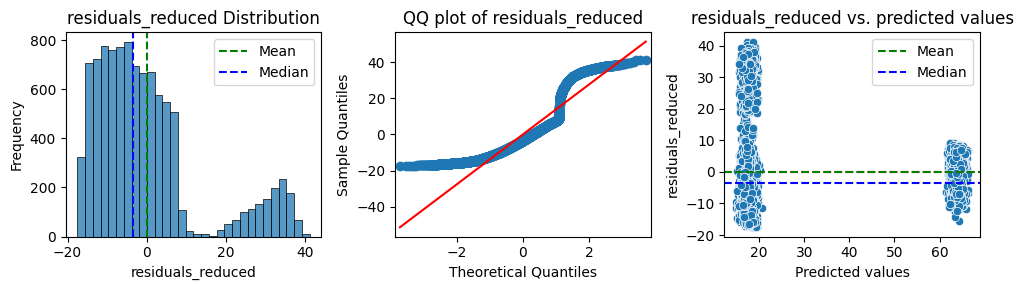

In [56]:
# Plot the residuals_reduced
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# residuals_reduced Distribution
sns.histplot(residuals_reduced, bins=30, ax=axes[0])
axes[0].set_xlabel('residuals_reduced')
axes[0].set_ylabel('Frequency')
axes[0].set_title('residuals_reduced    Distribution')

#  mean and median lines  the histogram
mean_residuals_reduced = residuals_reduced.mean()
median_residuals_reduced = residuals_reduced.median()
axes[0].axvline(x=mean_residuals_reduced, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals_reduced, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot of residuals_reduced
sm.qqplot(residuals_reduced, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals_reduced")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals_reduced, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("residuals_reduced")
axes[2].set_title("residuals_reduced vs. predicted values")

# Add mean and median 
mean_residuals_reduced = residuals_reduced.mean()
median_residuals_reduced = residuals_reduced.median()
axes[2].axhline(y=mean_residuals_reduced, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals_reduced, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()

> **Part V: Data Summary and Implications**

> F. Summarize your findings and assumptions by doing the following:

> 1. Discuss the results of your data analysis, including the following elements:
>    * a regression equation for the reduced model
>    * an interpretation of the coefficients of the reduced model
>    * the statistical and practical significance of the reduced model
>    * the limitations of the data analysis
> 2. Recommend a course of action based on your results.


### Reduced model: 
>   **(ŷ) = 17.3266 + 46.4413(ReAdmis) - 0.4551(HighBlood) + 0.6742(Arthritis) - 0.4176(Hyperlipidemia) + 0.5454(Anxiety)**


**MODEL Statistical Significance SUMMARY:**
- The**R-squared** went from 0.726 to 0.725 to `0.724`
- **Adj.** **R-squared** went from 0.725 to 0.724 to `0.724` as well.
- The **F-statistic** went from 714.14 to 1314 to `5252` all with a Prob (F-statistic) of 0.0. The f-statistic increase suggests that the model is a much better fit than the previous model.
- The **AIC** and **BIC** went from 8.090e+04 and 8.117e+04 to AIC 8.092e+04 and BIC 8.107e+04 to `AIC 8.090e+04` and `BIC 8.095e+04`, very close to each other.
- **Residual Standard Error** calculation (RSE): 13.79 to remain at `13.8` no matter the model change.
- The *condition number* went from 8.88e+05 to 5.64e+05 to `3.63` suggesting that the multicollinearity is less of an issue in this model. Likely helped by the remove of features.
- a **Durbin-Watson** statistic of 1.269 suggests that there is some positive autocorrelation in the model's residuals. This could potentially be a problem because the assumption of independence of errors may be violated.

**(ŷ) = 17.3266 + 46.4413(ReAdmis) - 0.4551(HighBlood) + 0.6742(Arthritis) - 0.4176(Hyperlipidemia) + 0.5454(Anxiety)**

>    **Interpretation of the coefficients**: *(Note, this is a very basic interpretation of what this formula tells us, this does not mean what the model is telling us is actually accurate or useful.)*

**(ŷ)** represents the predicted value of the dependent variable, which in this case is the *initial* number of days spent in the hospital.

-   The intercept (17.3266) is the value of (ŷ) when all independent variables are zero. In other words, if a patient has not been `ReAdmitted`, has no `HighBlood` pressure, no `Arthritis`, no `Hyperlipidemia`, and no `Anxiety`, the predicted number of`Initial_days` in the hospital would be approximately `17  days`
-   The coefficients for each explanatory variable indicate the change in the predicted value of (ŷ) for a *one-unit* increase in that variable, when alll other variables remain constant.

**Relationships between the independent variables and the predicted number of `Initial_days` in the hospital are such:**

-   * A readmitted patient (`ReAdmis`) is associated with a longer hospital stay.
-   * High blood pressure (`HighBlood`) is associated with a shorter hospital stay.
-   * Arthritis (`Arthritis`) is associated with a longer hospital stay.
-   * Hyperlipidemia (`Hyperlipidemia`) is associated with a shorter hospital stay.
-   * Anxiety (`Anxiety`) is associated with a longer hospital stay.

The magnitudes of the coefficients also indicate the relative strength of each variable's association with the predicted outcome. The coefficient for ReAdmis (46.4413) is the largest, suggesting that a history of readmission has the strongest impact on the length of hospital stay among the variables included in the model. However, there is a major problem that the high coefficient and low  P-value for `ReAdmis` admittedly mislead me on.

We have a model that's designed to predict how many days a patient might initially spend in the hospital, and it uses various health conditions as input factors. However, it has a significant limitation in its design and the way I used one of these factors, namely the patient's readmission status. In a real-world context, according to the data dictionary, the patient's **re**admission can  only occurs after they have had and Initial stay, making readmission a *future event compared to their initial stay*. In this model, `ReAdmission` status is currently being treated as a factor that can predict the initial hospital stay. But logically, this isn't possible because one can't use information from the future to predict the pas This a fundamental issue with how the prediction model was constructed and a reminder that models aren't just about variables and coefficients, but having a fundamental understanding of the data and its context in in the real world.

Given the results and limitations of the model, my recommended course of action would include a few key steps. At this point, I wouldn't recommend using this model in its current state. If this were a real-world scenario, I would consider myself to be in the exploratory phase of the project. Taking the information we've gathered, I suggest re-evaluating both the explanatory and target variables.
    
One issue that stands out is the bimodal distribution of the target variable, initial days. During this project, I learned that bimodal distributions can represent two distinct populations within the data set. To address this, I recommend possibly splitting the data and performing appropriate transformations to try and make the distributions of each population more normal.

Moving forward, it's crucial to better understand all the variables. Consulting with domain experts and getting additional data analytics expertise, particularly when it comes to selecting and transforming potential explanatory variables, would be highly beneficial.

I want to highlight something interesting I noticed while creating the visualizations, although I'm not entirely sure what it means yet. If we look at the box plot comparing the `Initial_days` with the r`ReAdmis` variable, it forms a pattern that stood out in the visualizations from part C. Interestingly, the scatterplot of the model's predicted values against the actual values has a strikingly similar pattern to the boxplots I mentioned. I believe there's something worth exploring here.

The next project involves logistical regression, and I'm curious to investigate whether it would be useful to explore these variables in the opposite context. Perhaps the initial days in the hospital can help predict readmission status. This is the direction I plan to pursue in my next course of investigation.





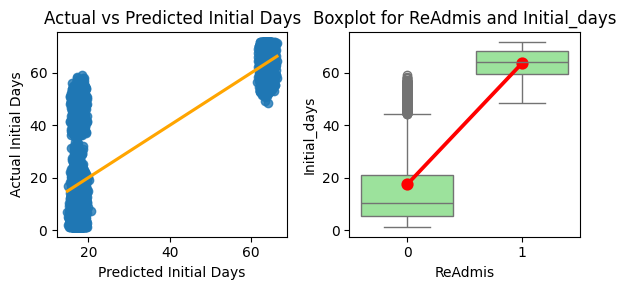

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Actual vs Predicted Initial Days
sns.regplot(x=predictions, y=Y, fit_reg=True, line_kws={'color':'orange'}, ax=axes[0])
axes[0].set_xlabel('Predicted Initial Days')
axes[0].set_ylabel('Actual Initial Days')
axes[0].set_title('Actual vs Predicted Initial Days')

# Boxplot for ReAdmis and Initial_days
sns.boxplot(data=df, x='ReAdmis', y='Initial_days', color='lightgreen', ax=axes[1])
sns.pointplot(data=df, x='ReAdmis', y='Initial_days', color='red', estimator=np.mean, errorbar=None, ax=axes[1])
axes[1].set_title('Boxplot for ReAdmis and Initial_days')

plt.tight_layout()
plt.show()

# Conclusion

This project was a remarkable learning experience, the instructors indicated that the project would force tough decisions, highlighting the absence of standout models and the essential nature of hard choices. As I reached the project's conclusion, I recognized possible mistakes and oversights along the way. Despite the urge to correct these errors, I opted to keep them, valuing the learning process over the creation of a flawless model as well as the reality of deadlines. This project provides a blueprint of my thinking; a reminder of overlooked aspects crucial for future analysis projects.


### References


- Datacamp. (2023, December 12). D207 - Exploratory Data Analysis. Retrieved from https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis 

- Middleton, K. (2022, November). Getting started with D208 Part I [Webinar]. Western Governors University. Retrieved March 2024, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970

- Eyre, I. (2024, March). Python Seaborn: A Guide to Using Seaborn for Data Visualization. Real Python. Retrieved March 2024, from https://realpython.com/python-seaborn/

- Statology. (n.d.). *The Five Assumptions of Multiple Linear Regression*. Statology. Retrieved March 10, 2024, from www.statology.org/multiple-linear-regression-assumptions/

- GeeksforGeeks. (n.d.). Interpreting the results of linear regression using OLS summary. Retrieved March 24, 2024, from https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

- Indhumathy Chelliah. (2021, August 3). Everything to know about residuals in linear regression. Retrieved March 24, 2024, from https://indhumathychelliah.com/2021/08/03/everything-to-know-about-residuals-in-linear-regression/

- Kross, S. (2016, February 29). A Q-Q Plot Dissection Kit. Retrieved March 24, 2024, from https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html

- Bradley, C. (2023). How do you transform a skewed bimodal data set into a normal distribution? Retrieved March 24, 2024, from https://www.kaggle.com/code/chrisbradley/tab-playground-predicting-bimodal-distribution

- Manl, F. (n.d.). Intermediate Regression with statsmodels in Python. Retrieved March 24, 2024, from https://github.com/FraManl/DataCamp/blob/main/Intermediate%20Regression%20with%20statsmodels%20in%20Python.ipynb

- Python Graph Gallery. (n.d.). Retrieved March 24, 2024, from https://python-graph-gallery.com/

- ResearchGate. (n.d.). Normal probability plots. Retrieved March 24, 2024, from https://www.researchgate.net/figure/Normal-pro-bability-plots-a-ideal-b-heavy-tailed-distri-bution-c-light-tailed_fig1_262663278

- Statology. (n.d.). Multiple Linear Regression Assumptions. Retrieved March 24, 2024, from https://www.statology.org/multiple-linear-regression-assumptions/

- Stack Exchange. (n.d.). Multicollinearity: When individual regressions are significant but VIFs are low. Retrieved March 24, 2024, from https://stats.stackexchange.com/questions/24464/multicollinearity-when-individual-regressions-are-significant-but-vifs-are-low

- Stack Overflow. (2020, August 10). Residual standard error of a regression in Python. Retrieved March 24, 2024, from https://stackoverflow.com/questions/63333999/residual-standard-error-of-a-regression-in-python

- Western Governors University. (n.d.). R or Python? Retrieved March 24, 2024, from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html

- @UnfoldDataScience YouTube. (n.d.). Checking MLR Assumptions. Retrieved March 24, 2024, from https://www.youtube.com/watch?v=_XAurJJQ7jw

- Sewell, W. (2024). [PowerPoint slides on model tuning]. Western Governors University. Retrieved March 24, 2024, from https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

 **Software References**

The following software packages were used in this project:

* **pandas** pandas is a Python library providing data structures and data analysis tools.
* **numpy** NumPy is a Python library for scientific computing.
* **matplotlib** Matplotlib is a Python library for creating static, animated, and interactive visualizations.
* **seaborn** Seaborn is a Python library for statistical data visualization built on top of matplotlib.
* **statsmodels** Statsmodels is a Python library for statistical modeling and econometrics.
* **Scikit-learn**  Scikit-learn is a free machine learning library for Python.

- Python Software Foundation. (2023). Python Language Reference, version 3.9.6. Retrieved from https://www.python.org

- Scikit-Learn:
  Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825-2830. Retrieved from https://scikit-learn.org

- Jinja2:
  Ronacher, A. (2023). Jinja2: The modern and designer-friendly templating engine for Python. Retrieved from https://jinja.palletsprojects.com/

- Matplotlib:
  Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering, 9*(3), 90-95. Retrieved from https://matplotlib.org

- Statsmodels:
  Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with python. In *Proceedings of the 9th Python in Science Conference* (Vol. 57, p. 61). Retrieved from https://www.statsmodels.org

- Pandas:
  McKinney, W. (2010). Data Structures for Statistical Computing in Python. In *Proceedings of the 9th Python in Science Conference* (pp. 51-56). Retrieved from https://pandas.pydata.org

- NumPy:
  Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature, 585*(7825), 357-362. Retrieved from https://numpy.org

- Seaborn:
  Waskom, M. (2021). Seaborn: statistical data visualization. *Journal of Open Source Software, 6*(60), 3021. Retrieved from https://seaborn.pydata.org




- Education level (discrete): 1 = High school, 2 = Bachelor's, 3 = Master's, 4 = PhD
- Work experience (continuous): Number of years in the workforce
- Gender (binary): 0 = Male, 1 = Female

Example 1: Linear relationship
In this scenario, the relationship between the predictors and the dependent variable is linear:

- Each increase in education level (e.g., from high school to bachelor's) is associated with a constant increase in annual income, regardless of work experience or gender.
- Each additional year of work experience is associated with a constant increase in annual income, regardless of education level or gender.
- The difference in annual income between males and females is constant, regardless of education level or work experience.

In this case, an MLR model with OLS would be appropriate, as the assumptions of linearity and constant effects are met.

Example 2: Non-linear relationship (interaction)
In this scenario, there is an interaction between education level and work experience:

- The effect of work experience on annual income differs depending on the education level. For example, an additional year of work experience may lead to a larger increase in income for those with a higher education level compared to those with a lower education level.
- The relationship between education level and annual income remains constant across genders.

In this case, the assumption of constant effects is violated due to the interaction between education level and work experience. To account for this, the MLR model would need to include an interaction term between these two predictors.

Example 3: Non-linear relationship (polynomial)
In this scenario, the relationship between work experience and annual income is non-linear:

- The effect of work experience on annual income is not constant. Instead, income increases rapidly in the early years of work experience but then plateaus or even declines in later years.
- The relationships between education level and gender with annual income remain linear.

In this case, the assumption of linearity is violated for the work experience predictor. To account for this, the MLR model would need to include a polynomial term (e.g., work experience squared) to capture the non-linear relationship.

In both Example 2 and Example 3, the MLR model with OLS can still be used, but it needs to be modified to account for the non-linear relationships or interactions. Alternatively, other modeling techniques, such as generalized additive models or decision trees, may be more appropriate if the non-linearities or interactions are complex.

In [59]:
# clean cache for improved performance
import gc
x = gc.collect()

x

0